In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

measurements = {
    "acc": pd.read_json('accelerometer_details.json'),
    "gyro": pd.read_json('gyroscope_details.json')
}

# Sort by timestamp while preserving measurementId
for name in ["acc", "gyro"]:
    measurements[name].sort_values(by=['measurementId', 'timestampUtc'], ascending=[True, True], inplace=True)
    measurements[name] = measurements[name].reset_index(drop=True) # update index




In [2]:
# Time difference between measurements
for name in ["acc", "gyro"]:
    measurements[name]['diff'] = measurements[name].groupby(['measurementId'])['timestampUtc'].diff()

difference_info_df = pd.DataFrame()
for name in ["acc", "gyro"]:
    difference_info_df[f"{name}_max"] = measurements[name].groupby('measurementId')["diff"].max()
    difference_info_df[f"{name}_min"] = measurements[name].groupby('measurementId')["diff"].min()

# This is not supported by pandas:
# difference_info_df["average"] = measurements[name].groupby('measurementId')["diff"].mean()
# So instead global average must be enough
print("Time difference between measurements")
print(difference_info_df)
for name in ["acc", "gyro"]:
    print(f"{name} average: {measurements[name]['diff'].mean()}")
    print(f"{name} max: {measurements[name]['diff'].max()}")
    print(f"{name} min: {measurements[name]['diff'].min()}")



Time difference between measurements
                             acc_max                acc_min  \
measurementId                                                 
1             0 days 00:00:00.152000 0 days 00:00:00.018000   
3             0 days 00:00:00.139000 0 days 00:00:00.005000   
4             0 days 00:00:00.111000 0 days 00:00:00.075000   
5             0 days 00:00:00.111000 0 days 00:00:00.075000   
6             0 days 00:00:00.111000 0 days 00:00:00.075000   
7             0 days 00:00:00.111000 0 days 00:00:00.075000   
8             0 days 00:00:00.111000 0 days 00:00:00.075000   
9             0 days 00:00:00.185000 0 days 00:00:00.009000   
11            0 days 00:00:00.149000 0 days 00:00:00.009000   
13            0 days 00:00:00.181000 0 days 00:00:00.018000   
14            0 days 00:00:00.135000 0 days 00:00:00.043000   
15            0 days 00:00:00.136000 0 days 00:00:00.026000   
16            0 days 00:00:00.136000 0 days 00:00:00.008000   
18            0 da

acc histogram:


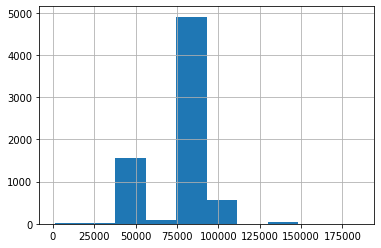

gyro histogram:


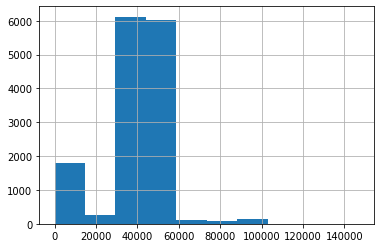

In [3]:
for name in ["acc", "gyro"]:
    print(f"{name} histogram:")
    measurements[name]['diff'].dt.microseconds.hist()
    plt.show()


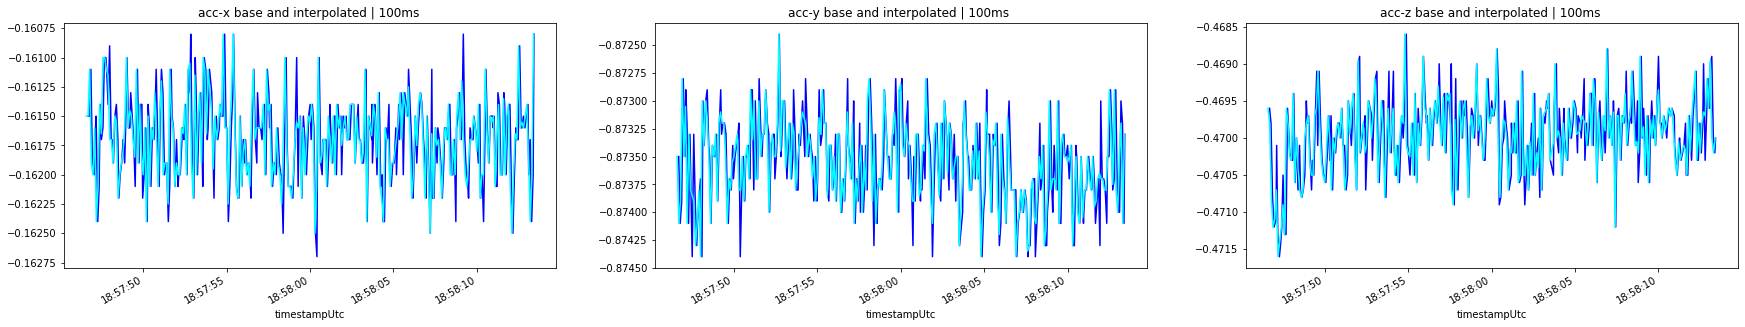

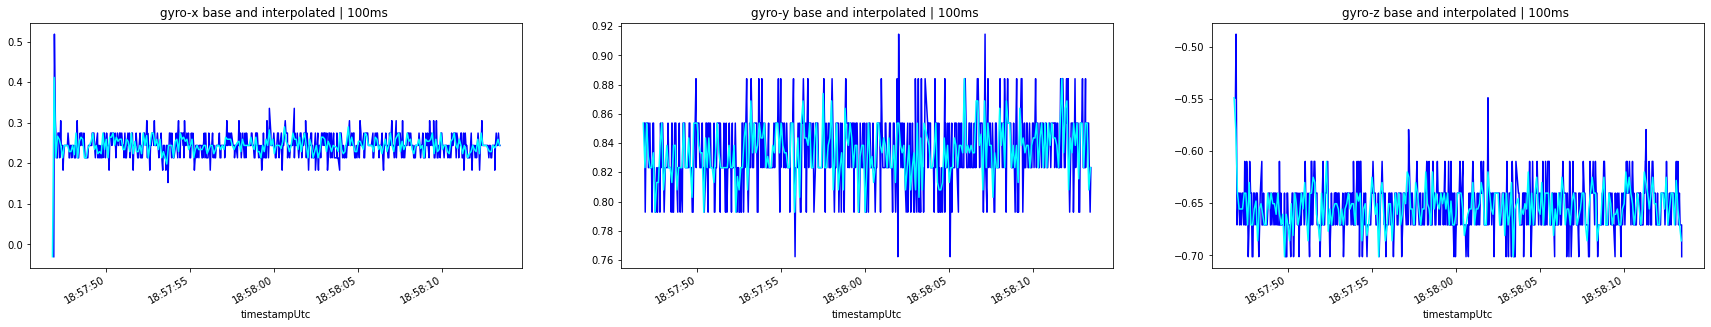

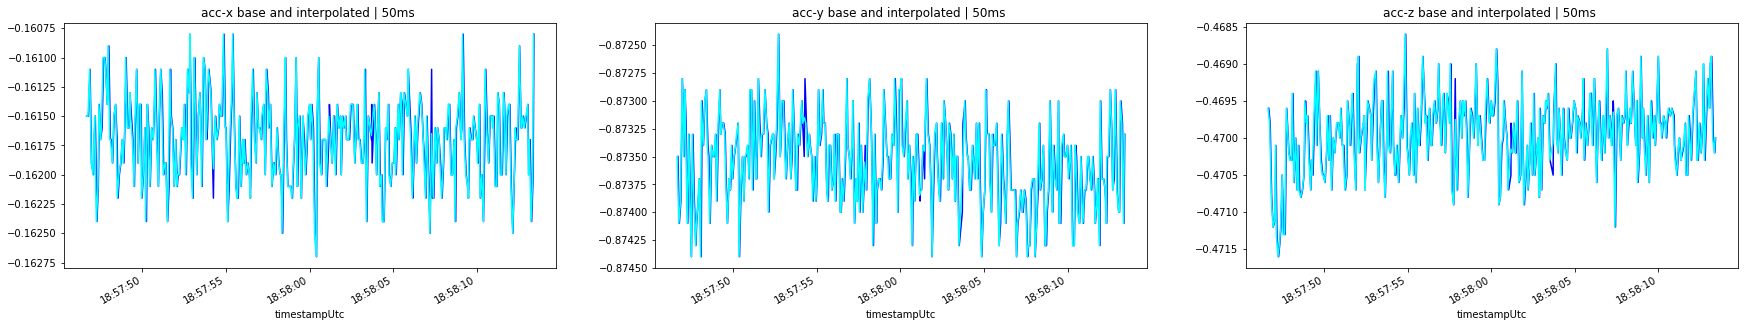

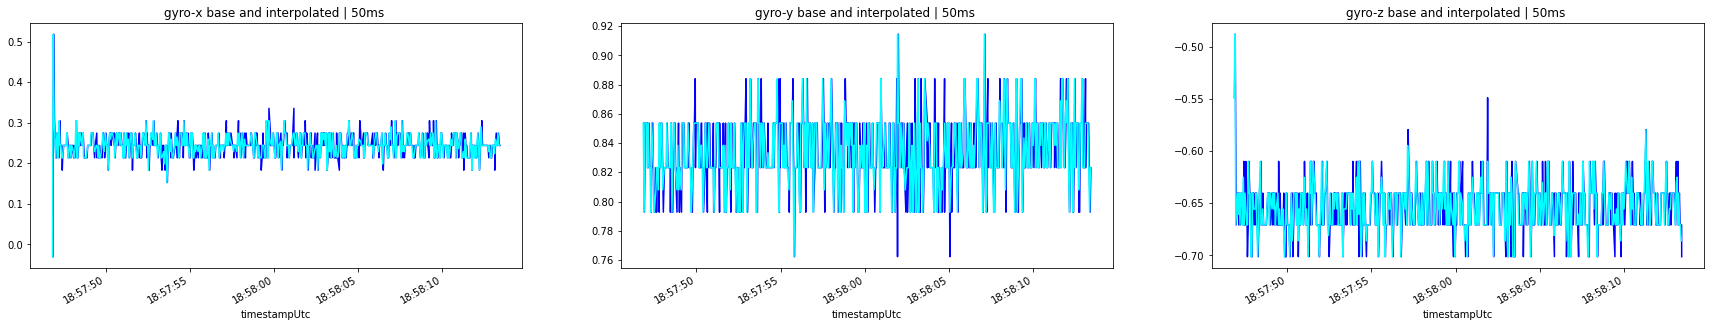

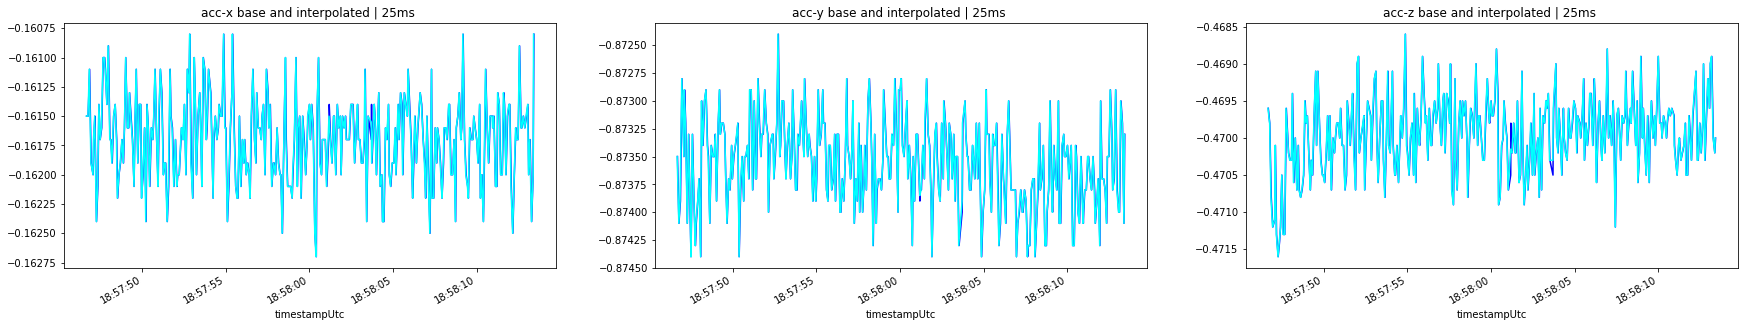

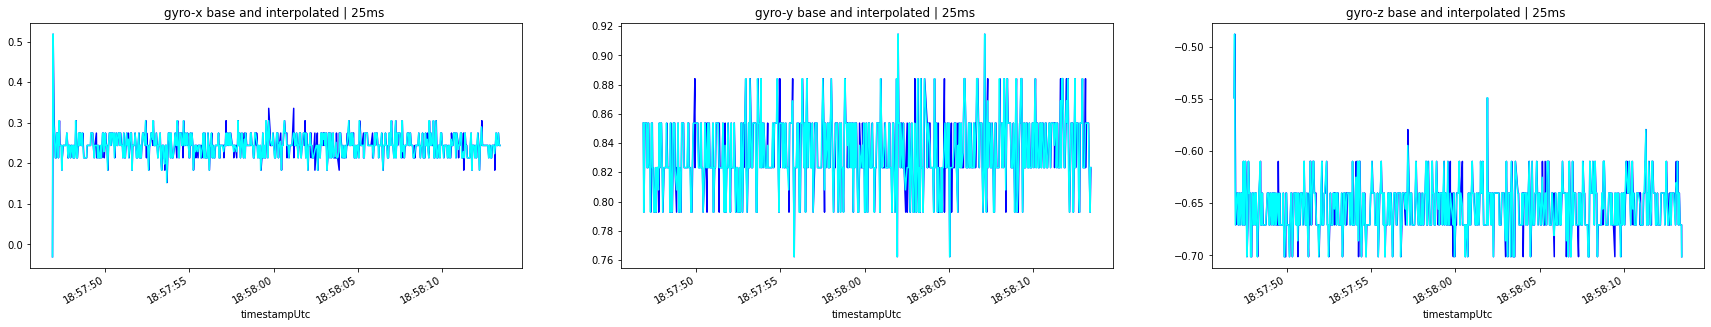

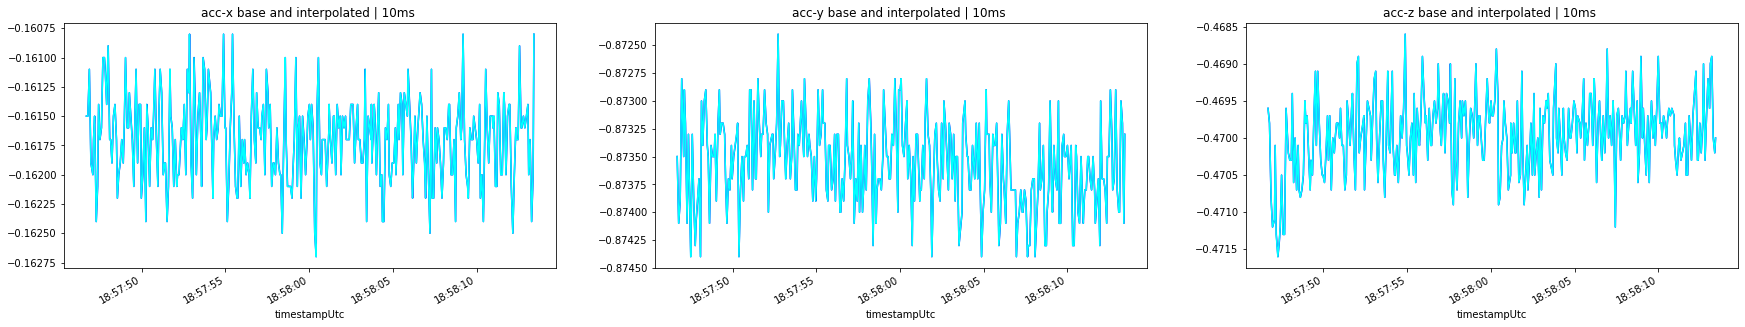

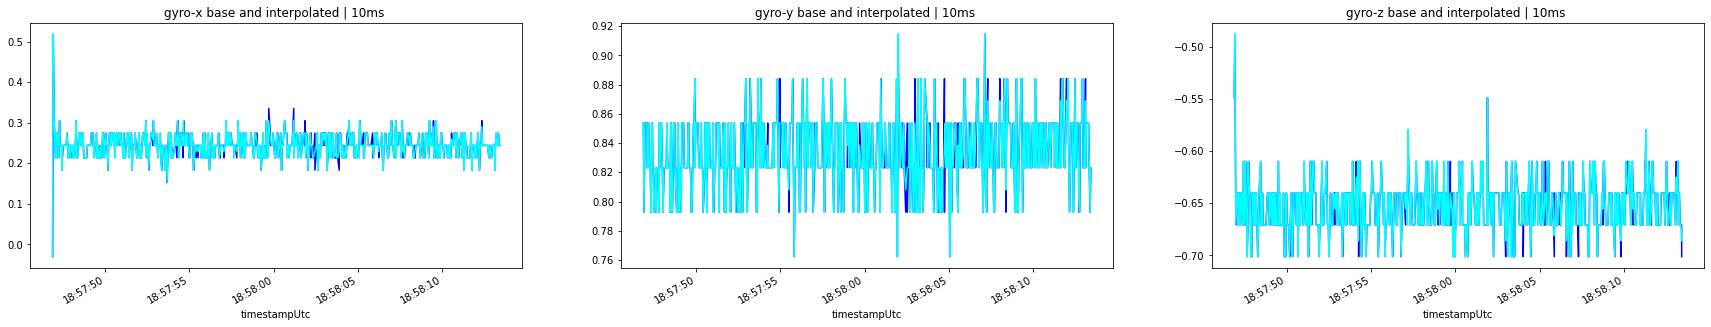

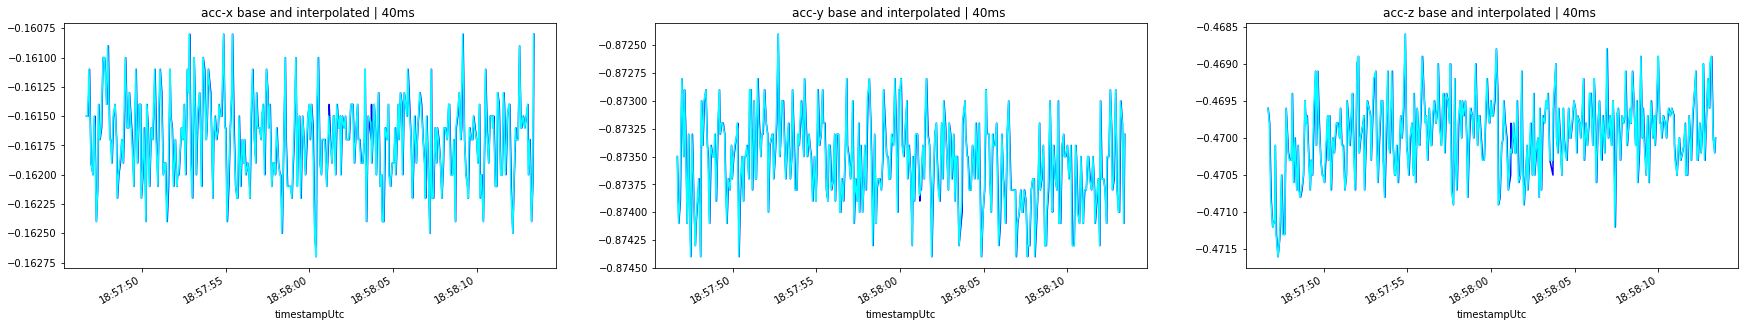

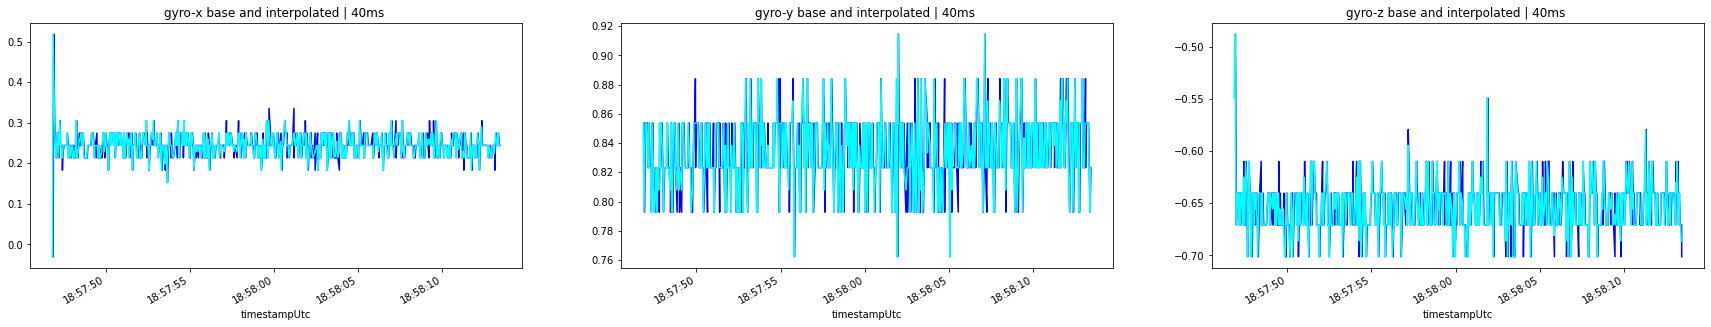

In [5]:
# Get values for only one measurementId
measurement_id = 9

df_filtered = {
    "acc": measurements['acc'][measurements['acc']['measurementId'] == measurement_id],
    "gyro": measurements['gyro'][measurements['gyro']['measurementId'] == measurement_id]
}
for resample_time_interval in ['100ms', '50ms', '40ms' , '25ms', '10ms']:
    df_resampled = {}
    df_interpolated = {}
    for name in ["acc", "gyro"]:
        # Base
        df_filtered[name] = measurements[name][measurements[name]['measurementId'] == measurement_id]
        # resampling
        df_resampled[name] = df_filtered[name].set_index('timestampUtc').resample(resample_time_interval).mean()
        # interpolation
        df_interpolated[name] = df_resampled[name].interpolate('linear')

    # combined
    for name in ["acc", "gyro"]:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))
        for idx, direction in enumerate(['x', 'y', 'z']):
            (df_filtered[name]
                .set_index('timestampUtc')[direction]
                #.head(50)
                .plot(ax=axes[idx], color="blue", title=f"{name}-{direction} base and interpolated | {resample_time_interval} ")
            )
            (df_interpolated
                [name]
                [direction]
                #.head(50)
                .plot(ax=axes[idx], color="cyan")
            )
        plt.show()


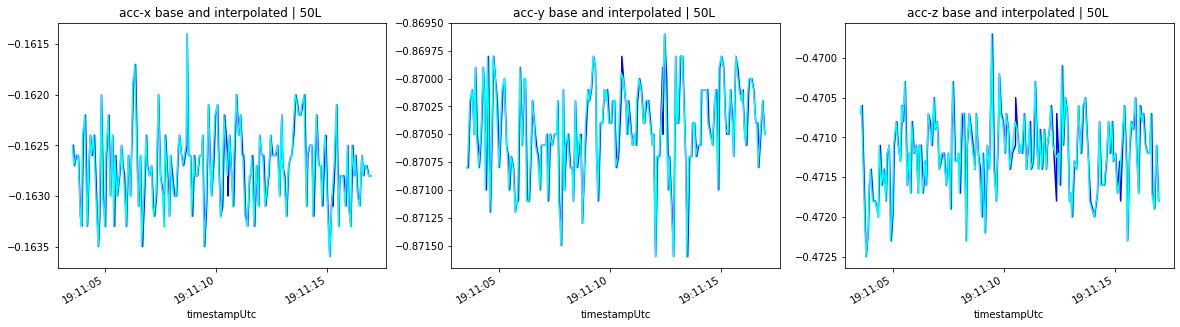

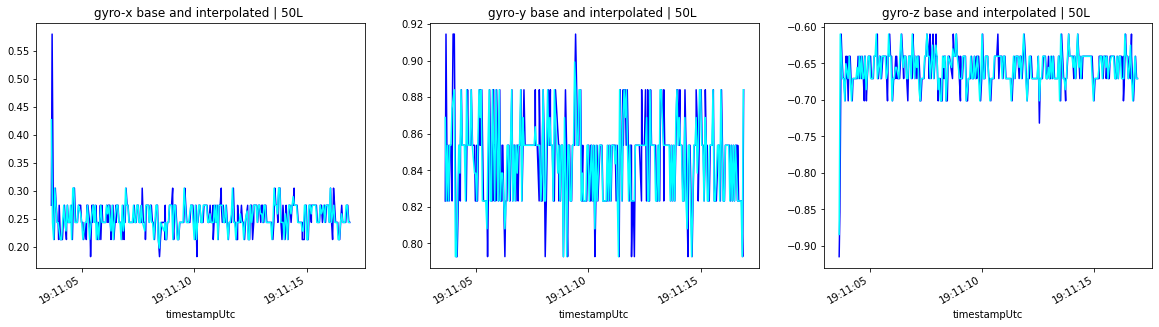

In [38]:
# combined
for name in ["acc", "gyro"]:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
    for idx, direction in enumerate(['x', 'y', 'z']):
        df_filtered[name].set_index('timestampUtc')[direction].plot(ax=axes[idx], color="blue", title=f"{name}-{direction} base and interpolated | {resample_time_interval} ")
        df_interpolated[name][direction].plot(ax=axes[idx], color="cyan")
    plt.show()


In [ ]:
# Junkyard

# df_filtered = measurements["acc"][measurements["acc"]['measurementId'] == 11]
# microseconds_interval = 50000

# min_time = df_filtered["timestampUtc"].min()
# max_time = df_filtered["timestampUtc"].max()
# print(min_time)
# print(max_time)
# print(timedelta(microseconds=microseconds_interval))
# print(min_time.ceil(freq=f"{microseconds_interval}L"))

# current_time = min_time
# interpolated_time=[min_time]

# separate
# for direction in ['x', 'y', 'z']:
#     print(f"{direction} base")
#     df_filtered.set_index('timestampUtc')[direction].plot(title=f"{data_type}-{direction} base | {resample_time_interval}")
#     plt.show()
#     print(f"{direction} interpolated")
#     df_interpolated[direction].plot(color="cyan", title=f"{data_type}-{direction} interpolated | {resample_time_interval}")
#     plt.show()
